In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, quantile
from numpy.random import randint, permutation

# Scalar Quantiles via Optimal Transport

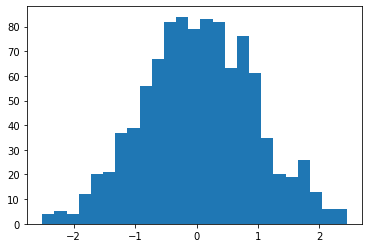

In [2]:
from vqr.data import generate_mvn_data

d = 1
k = 1
T = 50
N = 1000

X, Y = generate_mvn_data(N, d, k)

plt.hist(Y, 25);

In [3]:
from vqr.vqr import VectorQuantileRegressor

vqr = VectorQuantileRegressor(n_levels=T, solver_opts={'verbose': True})
vqr.fit(X, Y)

                                     CVXPY                                     
                                    v1.1.13                                    
(CVXPY) Jul 27 03:40:34 PM: Your problem has 50000 variables, 3 constraints, and 0 parameters.
(CVXPY) Jul 27 03:40:34 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 27 03:40:34 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 27 03:40:34 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 27 03:40:34 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jul 27 03:40:34 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> C

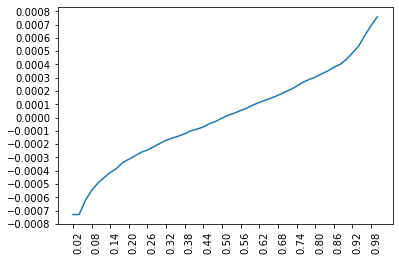

In [4]:
vqr.plot_quantiles();

# 2D Vector Quantiles

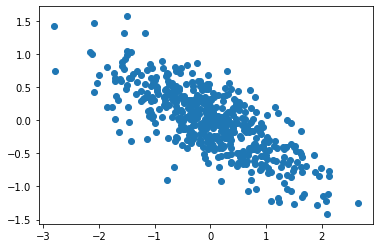

In [5]:
from vqr.data import generate_mvn_data

d = 2
k = 1
T = 25
N = 500

X, Y = generate_mvn_data(N, d, k, seed=42)
plt.scatter(Y[:, 0], Y[:, 1])

In [6]:
from vqr.vqr import VectorQuantileRegressor

vqr = VectorQuantileRegressor(n_levels=T, solver_opts={'verbose': True})
vqr.fit(X, Y)

                                     CVXPY                                     
                                    v1.1.13                                    
(CVXPY) Jul 27 03:40:36 PM: Your problem has 312500 variables, 3 constraints, and 0 parameters.
(CVXPY) Jul 27 03:40:36 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 27 03:40:36 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 27 03:40:36 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 27 03:40:36 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jul 27 03:40:36 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> 

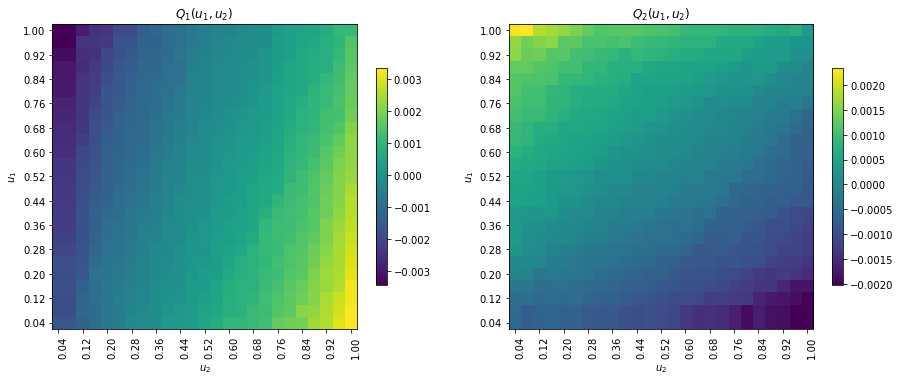

In [7]:
vqr.plot_quantiles(figsize=(15, 20));

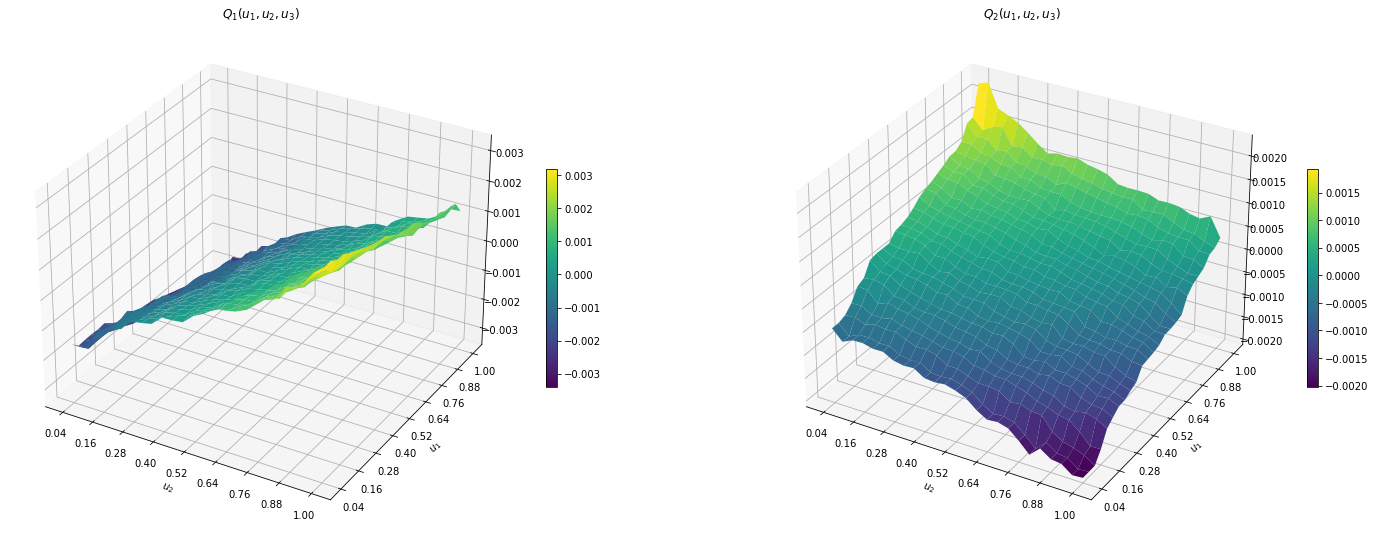

In [8]:
vqr.plot_quantiles_3d(figsize=(25, 20));

### Validate monotonicity

In [9]:
U1, U2 = vqr.quantile_grid
Q1, Q2 = vqr.quantile_values

import itertools as it

EPS=0.0001

ii = jj = tuple(range(1, T))

n, n_c = 0, 0
offending_points = []
offending_dists = []
for i0, j0 in it.product(ii, jj):
    
    u0 = np.array([U1[i0, j0], U2[i0, j0]])
    q0 = np.array([Q1[i0, j0], Q2[i0, j0]])
    
    for i1, j1 in it.product(ii, jj):
        n+=1

        u1 = np.array([U1[i1, j1], U2[i1, j1]])
        q1 = np.array([Q1[i1, j1], Q2[i1, j1]])
        
        if np.dot(q1-q0, u1-u0) < -EPS:
            offending = (
                f"{(i0, j0)=}, {(i1, j1)=}, "
                f"{q1-q0=}, "
                f"{u1-u0=}, "
                f"{np.dot(q1-q0, u1-u0)=}"
            )
            offending_points.append(offending)
            offending_dists.append(np.dot(q1-q0, u1-u0).item())
            n_c +=1
            

print(f"{n=}, {n_c=}, {n_c/n=:.2f}")
assert len(offending_points)==0

n=331776, n_c=0, n_c/n=0.00


# 3D Vector Quantiles

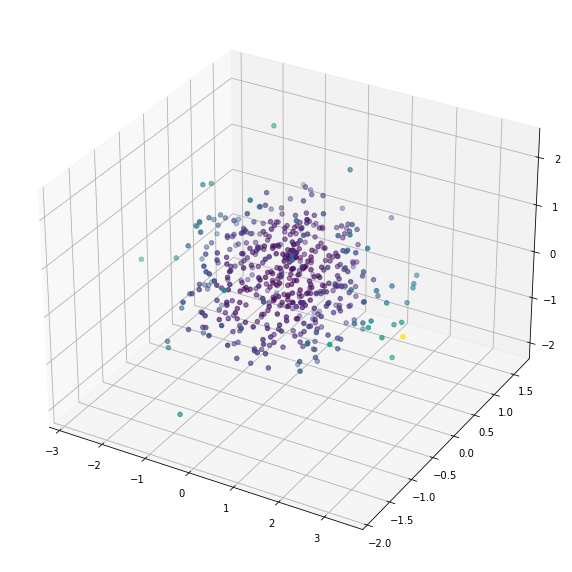

In [10]:
from vqr.data import generate_mvn_data

d = 3
k = 1
T = 10
N = 500

X, Y = generate_mvn_data(N, d, k)

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(10, 20))
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=np.sum(Y**2, axis=1))

In [11]:
from vqr.vqr import VectorQuantileRegressor

vqr = VectorQuantileRegressor(n_levels=T, solver_opts={'verbose': True})
vqr.fit(X, Y)

                                     CVXPY                                     
                                    v1.1.13                                    
(CVXPY) Jul 27 03:40:53 PM: Your problem has 500000 variables, 3 constraints, and 0 parameters.
(CVXPY) Jul 27 03:40:53 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 27 03:40:53 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 27 03:40:53 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 27 03:40:53 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jul 27 03:40:53 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> 

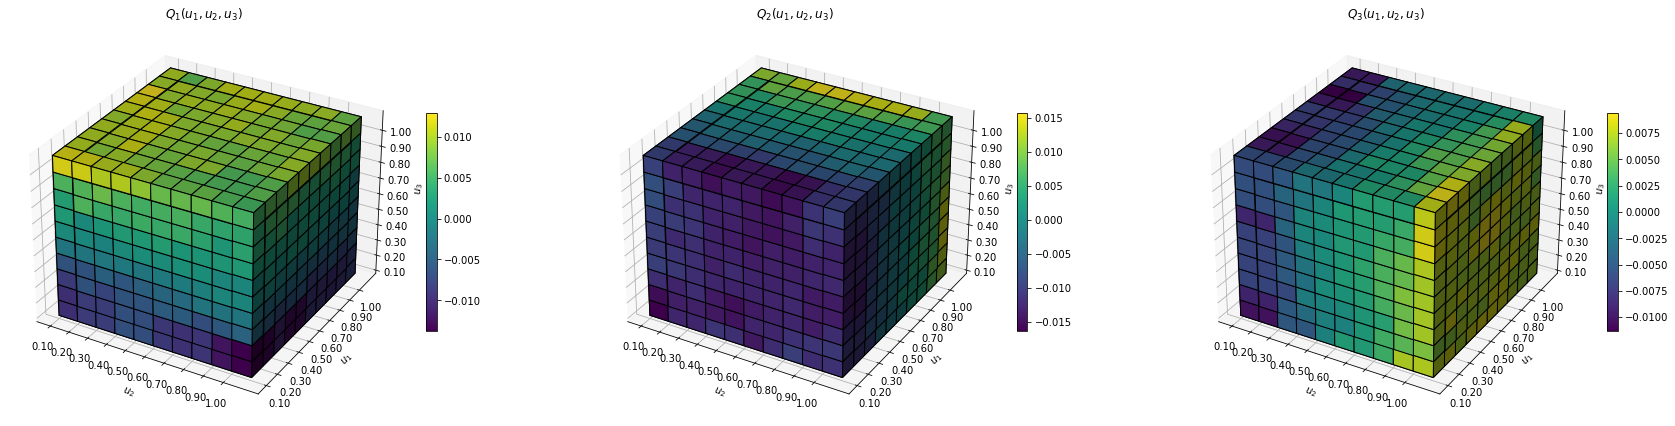

In [12]:
fig = vqr.plot_quantiles_3d(figsize=(30, 20))